![](resource/ml_workflow.png)

#### Previous Implementation
- Face Detection : **Haar Cascade Classifier**
    - Pros : 
            - processing speed  
    - Cons : 
            - face need to be align to front
    
- Feature Extraction (Facial Descriptor) : **Local Binary Pattern Histogram (LBPH)**
    - Pros : 
            - high discriminative, 
            - invariance to grayscale, 
            - simple computation.
    - Cons : 
            - performace degradation to large dataset, 
            - miss the local structure, 
            - sensitive to noise.
    
- Classifier : **Support Vector Machine**
    - Pros : 
            - works well on clear margin of separation,
            - effective in high dimensional spaces,
            - effective in cases where the number of dimensions is greater than the number of samples.
    - Cons :
            - doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping,
            - doesn’t directly provide probability estimates.

___
![](resource/dl_workflow.png)

#### Next Implementation
- Deep Learning Algorithm :
    - Deep Neural Network
    - Convolution Nural Network
    - Recurrent Neural Netwrork
- Model Task :
    - Detection (Face Detection)
    - Feature Extraction 
    - Classification 

In [1]:
import os
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical


Using TensorFlow backend.


___
# Keras Library
- Keras API : https://keras.io/api/

### Keras Base Model `Sequential`
- Membuat model pad Keras :
>```
from keras.models import Sequential
model = Sequential()
model.add(...)
model.add(...)
model.add(...)
>```
- `keras.Sequential()`
    - `Sequential` groups a **linear stack** of layers into a `tf.keras.Model`.
    - `Sequential` provides training and inference features on this model.
    - use `model.add()` to add neural network layer into sequential model.<br><br><br>

### Dense Layer (Fully Connected Layer)
- `keras.layers.Dense()` : Fully Conneted Layer Neural Network.
- Add input layer pada Keras : **Layer pertama** pada Keras harus menyertakan `input_dim` atau `input_shape`,
>```
Dense(16, input_dim=8)
>```
- Hidden layer & Activation Layer
>```
Dense(16, activation='relu')
>```
- atau dapat ditulis sebagai berikut secara terpisah :
>```
Dense(16)
Activation("relu")
>```
- contoh Dense Layer :
>```
Input(3)
Dense(5)
Dense(2)
>```

<img src="resource/fcnn3.png" class="width:200px"></img>

### Training Model
- config network menggunakan `model.compile()`
    - loss 
    - optimizer
    - metric
>```
model.compile(optimizer='adam', 
          loss='categorical_crossentropy',
          metrics = ['accuracy'])
>```


- training model menggunakan `model.fit()`:
>```
model.fit(X, y, epochs=, batch_size=)
>```

### Jenis Optimizer di Keras
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- selengkapnya : https://keras.io/api/optimizers/

#### SGD vs Adam Optimizer
- SGD Optimizer
>```
tf.keras.optimizers.SGD(
    learning_rate=0.01, 
    momentum=0.0, 
    nesterov=False, 
    name="SGD", 
    **kwargs
)
>```
- Adam Optimizer (adaptive moment estimation)
>```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
>```


### Jenis Loss Di Keras
- **Probabilistic losses**
    - BinaryCrossentropy class
    - CategoricalCrossentropy class
- **Regression losses**
    - MeanSquaredError class
- selengkapnya : https://keras.io/api/losses/

### Jenis Metric di Keras
- **Accuracy metrics**
    - Accuracy class 
- ~~**Classification metrics based on True/False positives & negatives**~~ 
    - ~~Precision class~~ 
    - ~~Recall class~~
- Precision & Recall di hilagkan dari `keras` 2.0 keatas [sumber](https://github.com/keras-team/keras/wiki/Keras-2.0-release-notes)
- selengkapnya : https://keras.io/api/metrics/

___
# 0. Neural Network (Simple Keras Implementation)

### 0.1 Generate Dateset (rundom number with 5 class data)

In [4]:
def generate_dataset(size, classes=5, noise=10.5):
    # Generate random datapoints
    labels = np.random.randint(0, classes, size)
    x1 = (np.random.rand(size) + labels) / classes
    x2 = x1**2 + np.random.rand(size) * noise
    
    # Reshape data in order to merge them
    x1 = x1.reshape(size, 1)
    x2 = x2.reshape(size, 1)
    labels = labels.reshape(size, 1)
   
    # Merge the data
    data = np.hstack((x1, x2, labels))
    return data

In [5]:
dataset = generate_dataset(500)

In [6]:
dataset

array([[ 0.59588314,  7.98251136,  2.        ],
       [ 0.91713423,  1.7899772 ,  4.        ],
       [ 0.07227401,  6.24556266,  0.        ],
       ...,
       [ 0.95459678, 11.38601831,  4.        ],
       [ 0.45843011,  2.44036653,  2.        ],
       [ 0.20459315,  3.53585727,  1.        ]])

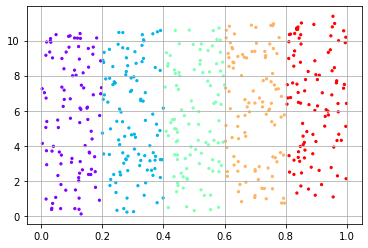

In [7]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:,2], s=5, cmap='rainbow')
plt.grid()
plt.show()

In [8]:
X = dataset[:, :2]
Y = dataset[:, 2]

In [9]:
X.shape, Y.shape

((500, 2), (500,))

### 0.2 Encoding Label & categoricalization

In [18]:
le = LabelEncoder()

le.fit(Y)

labels = le.classes_

print("Y :", Y[0])

Y = le.transform(Y)
print("Y (label encoding):", Y[0])

Y = to_categorical(Y)
print("Y (categorical):", Y[0])

Y : 2.0
Y (label encoding): 2
Y (categorical): [0. 0. 1. 0. 0.]


### 0.3 Split dataset

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,   # input data
                                                    Y,   # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)

In [20]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(375, 2) (375, 5) (125, 2) (125, 5)


### 0.4 Create Model

In [21]:
def simple_model(input_dim):
    
    model = Sequential()
    
    model.add(Dense(64, 
                    activation= 'relu',
                    input_shape=(input_dim,)))
    model.add(Dense(128, activation= 'relu',))
    model.add(Dense(32, activation= 'relu',))
    model.add(Dense(5)) # equal to number of classes
    model.add(Activation("sigmoid"))
    
    # print model network
    model.summary() 
    
    # config model : add optimizer, loss & metrics
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

### 0.5 Train Model

In [ ]:
input_dim = x_train.shape[1]  

EPOCHS = 100
BATCH_SIZE = 64

model = simple_model(input_dim)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.25   # 25% of train dataset will be used as validation set
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 12,805
Trainable params: 12,805
Non-trainable params: 0
_________________________________________________________________
Train on 281 samples, validate on 94 samples
Epoch 1/100


- jalankan training dengan `EPOCHS` dan `BATCH_SIZE` yang telah diset.
- `BATCH_SIZE` merupakan banyaknya sample yang akan di propagasikan kedalam Network
- Benefit menggunakan `BATCH_SIZE` < training sample
    - less memory to consume : karena menggunakan sedikit data saat diproses dalam network
    - network lebih cepat melakukan proses learning 
- Penggunaan `BATCH_SIZE` terlalu kecil dapat mengakibatkan gradient update fluktuatif
- 1 `EPOCH` artinya 1 forwardpass dan backwardpass untuk keseluruhan training sample
- Jumlah `ITERASI` banyaknya forwardpass dan backwardpass untuk tiap `BATCH_SIZE`
- contoh :
    - kita memiliki 1000 training sample
    - kita pilih `BATCH_SIZE` 10 dan `EPOCH` 5
    - sehingga pada tiap `EPOCH` akan dilakukan forwardpass dan backwardpass untuk 1000 training sample yang dibagi meenjadi 10 batch, dimana tiap batch nya akan diproses 100 sample.
    - Proses ini akan menghasilkan setidaknya 100x5 iterasi (forwardpass dan backwardpass).

In [ ]:
def evaluate_model_(history):
    names = [['acc', 'val_acc'], 
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

### 0.6 Predict to all test dataset

In [232]:
y_pred = model.predict(x_test)

- check prediction result 

In [233]:
y_pred[0]

array([3.36e-07, 6.44e-05, 3.03e-02, 9.46e-02, 1.80e-02], dtype=float32)

In [244]:
y_test.argmax(axis=1)[0] # get actual/target class

3

In [243]:
y_pred.argmax(axis=1)[0] # get predicted class

3

In [242]:
y_pred.max(axis=1)[0]*100 # get confidence level (%) 

9.461933374404907

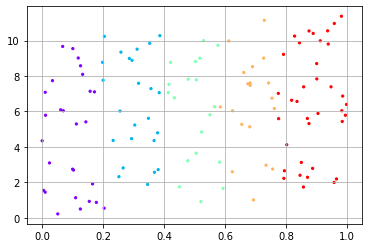

In [237]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred.argmax(axis=1), s=5, cmap='rainbow')
plt.grid()
plt.show()

### 0.7 Report Summary

In [238]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

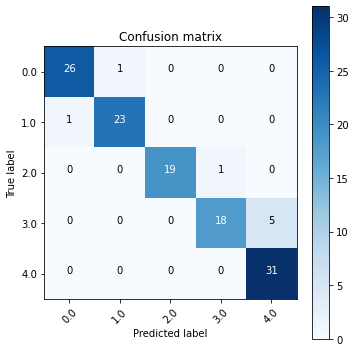

In [239]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')


In [240]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        24
           2       1.00      0.95      0.97        20
           3       0.95      0.78      0.86        23
           4       0.86      1.00      0.93        31

    accuracy                           0.94       125
   macro avg       0.95      0.93      0.94       125
weighted avg       0.94      0.94      0.94       125



____


# 1. Face Recognition using (Convolution Neural Network) CNN

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

#### Convolution Layer

- `keras.layers.Conv2d(filter, kernel_size, strides, padding, activation)`
> 2D convolution layer (e.g. spatial convolution over images).\
> This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
- parameter :
    - `filter` : Integer, the dimensionality of the output space.
    - `kernel_size` : kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
    - `strides` : An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
    - `padding` : one of `"valid"` or `"same"` (case-insensitive)
    - `activation` : Activation function to use. (`relu`, `sigmoid`, `softmax`, `linear`, .etc)

#### Max Pooling Layer

- `keras.layers.MaxPool2D(pool_size, strides, padding)`
> 2D Max pooling operation for spatial data.
- parameter :
    - `pool_size` : integer or tuple of 2 integers, factors by which to downscale.
    - `strides` : An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
    - `padding` : one of `"valid"` or `"same"` (case-insensitive)

#### Flatten Layer


- `keras.layers.Flatten()`
> Flattens the input data to 1D tensor.
- parameter :
    - N/A

## 1.1 read image & convert to grayscale

- Download Dataset : 
    - **LFW - images aligned with deep funneling** : http://vis-www.cs.umass.edu/lfw/
    
    
- Dataset Structure :

```
datset\
    label_name_A\
        label_name_A_001.jpg
        label_name_A_002.jpg
        label_name_A_003.jpg
        .
        .
    label_name_B\
        label_name_B_001.jpg
        label_name_B_002.jpg
        label_name_B_003.jpg
        .
        .
```

In [6]:
def detect_face(img):
    img = img[70:195,78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [7]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [8]:
dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    if len(files) < 50 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images.append(img)
                names.append(folder)

                print_progress(i, len(files), folder)


[####################] (77 samples)	 label : Ariel_Sharon 		
[####################] (150 samples)	 label : Colin_Powell 		
[####################] (121 samples)	 label : Donald_Rumsfeld 		
[####################] (150 samples)	 label : George_W_Bush 		
[####################] (109 samples)	 label : Gerhard_Schroeder 		
[####################] (71 samples)	 label : Hugo_Chavez 		
[####################] (52 samples)	 label : Jacques_Chirac 		
[####################] (55 samples)	 label : Jean_Chretien 		
[####################] (53 samples)	 label : John_Ashcroft 		
[####################] (60 samples)	 label : Junichiro_Koizumi 		
[####################] (52 samples)	 label : Serena_Williams 		
[####################] (144 samples)	 label : Tony_Blair 		


In [9]:
print("number of samples :", len(names))

number of samples : 1145


### 1.1.A Image Augmentation
- To solve problem with small dataset on some class, we can augmenting the data to increase number of sample.
- Image augmentation is a set of transfomration like translation, rotation, grayscale color adjust, etc. 

In [10]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])
    
    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30)) 
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))
    
    return imgs

- test augmentation result

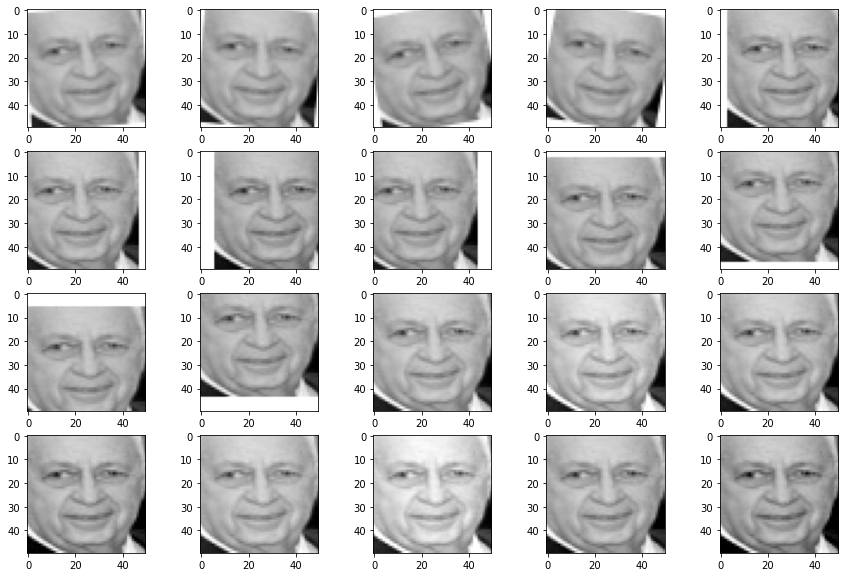

In [11]:
img_test = images[0]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test):
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

- apply augmentation to all images

In [12]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

- total augmentation image

In [13]:
len(augmented_images), len(augmented_names)

(22900, 22900)

In [14]:
images.extend(augmented_images)
names.extend(augmented_names)

- total images augmentation + original

In [15]:
len(images), len(names)

(24045, 24045)

In [16]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('Ariel_Sharon', 1617)
('Colin_Powell', 3150)
('Donald_Rumsfeld', 2541)
('George_W_Bush', 3150)
('Gerhard_Schroeder', 2289)
('Hugo_Chavez', 1491)
('Jacques_Chirac', 1092)
('Jean_Chretien', 1155)
('John_Ashcroft', 1113)
('Junichiro_Koizumi', 1260)
('Serena_Williams', 1092)
('Tony_Blair', 3024)
('Yunus', 1071)


### 1.1.B Balancing Data

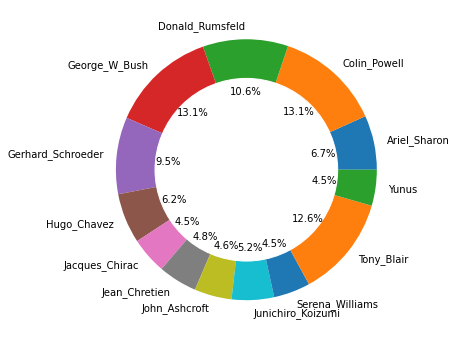

In [17]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(12,6))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, labels=label_name, autopct='%1.1f%%')
    plt.gcf().gca().add_artist(my_circle)
    plt.show()
    
unique = np.unique(names)
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [18]:
# reduce sample size per-class using numpy random choice
n = 1000

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(names, l) for l in np.unique(names)])

In [19]:
names = [names[m] for m in mask]
images = [images[m] for m in mask]

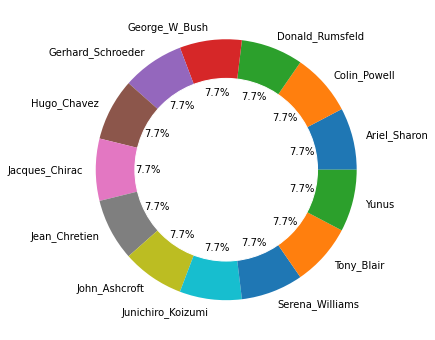

In [20]:
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

### 1.2 Encoding Label & Categoricalization

![](resource/encoding.png)

In [21]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [22]:
print("number of class :", len(labels))
print(labels)

number of class : 13
['Ariel_Sharon' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Jacques_Chirac' 'Jean_Chretien'
 'John_Ashcroft' 'Junichiro_Koizumi' 'Serena_Williams' 'Tony_Blair'
 'Yunus']


In [23]:
print(name_vec)

[ 0  0  0 ... 12 12 12]


In [24]:
print(categorical_name_vec)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### 1.3 Split Dataset

In [25]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32),   # input data
                                                    np.array(categorical_name_vec),       # target/output data 
                                                    test_size=0.15, 
                                                    random_state=42)

In [26]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(11050, 50, 50) (11050, 13) (1950, 50, 50) (1950, 13)


### 1.4 Reshape Data

In [27]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [28]:
x_train.shape, x_test.shape

((11050, 50, 50, 1), (1950, 50, 50, 1))

### 1.4 Create CNN Model

In [29]:
def cnn_model(input_shape):  
    model = Sequential()
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))  # equal to number of classes
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

### 1.5 Training CNN Model

In [30]:
input_shape = x_train[0].shape

EPOCHS = 10
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=0.15   # 15% of train dataset will be used as validation set
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
__________

- jalankan training dengan `EPOCHS` dan `BATCH_SIZE` yang telah diset.
- `BATCH_SIZE` merupakan banyaknya sample yang akan di propagasikan kedalam Network
- Benefit menggunakan `BATCH_SIZE` < training sample
    - less memory to consume : karena menggunakan sedikit data saat diproses dalam network
    - network lebih cepat melakukan proses learning 
- Penggunaan `BATCH_SIZE` terlalu kecil dapat mengakibatkan gradient update fluktuatif
- 1 `EPOCH` artinya 1 forwardpass dan backwardpass untuk keseluruhan training sample
- Jumlah `ITERASI` banyaknya forwardpass dan backwardpass untuk tiap `BATCH_SIZE`
- contoh :
    - kita memiliki 1000 training sample
    - kita pilih `BATCH_SIZE` 10 dan `EPOCH` 5
    - sehingga pada tiap `EPOCH` akan dilakukan forwardpass dan backwardpass untuk 1000 training sample yang dibagi meenjadi 10 batch, dimana tiap batch nya akan diproses 100 sample.
    - Proses ini akan menghasilkan setidaknya 100x5 iterasi (forwardpass dan backwardpass).

- Plot history accuracy , precision dan recall untuk training set dan validation set 

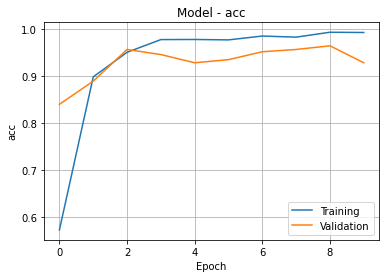

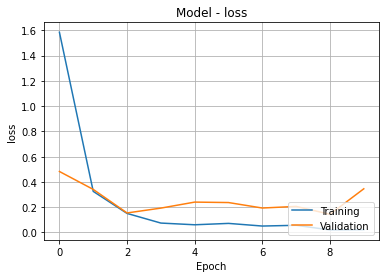

In [31]:
def evaluate_model_(history):
    names = [['acc', 'val_acc'], 
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

- pada plot accuracy untuk validation data terlihat lebih **fluktuatif**, apakah ini normal?
- ini bisa diakibatkan oleh `BATCH_SIZE` yang **terlalu kecil**, seperti contohnya jika pada dataset terdapat misslabeled data yang mengakibatkan nilai loss meningkat atau menjauhkannya dari local minima.
- efek ini bisa dihindari jika kita memilih `BATCH_SIZE` lebih besar. 
- Namun `BATCH_SIZE` yang **terlalu besar** dapat mengakibatkan **training** process menjadi lebih berat dan **lambat**.
- selain itu `BATCH_SIZE` **terlalu besar** akan mengakibatkan **generalization** pada model menjadi **jelek** (sumber [link](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e#:~:text=large%20batch%20size%20means%20the,all%20about%20the%20same%20size.))
- **Generalization** merupakan salah satu kemampuan Neural Network yang artinya model mampu mengklasifikasikan data yang tidak pernah dilihat sebelumnya (*unseen data*) (sumber [link](http://www.eie.polyu.edu.hk/~enzheru/snns/SNNSinfo/UserManual/node16.html#:~:text=Learning%20in%20Neural-,Generalization%20of%20Neural%20Networks,it%20has%20never%20seen%20before.))

- save model

In [32]:
model.save("model-cnn-facerecognition.h5")

- predict to all test dataset

In [33]:
# predict test data
y_pred=model.predict(x_test)

- plot confusion matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

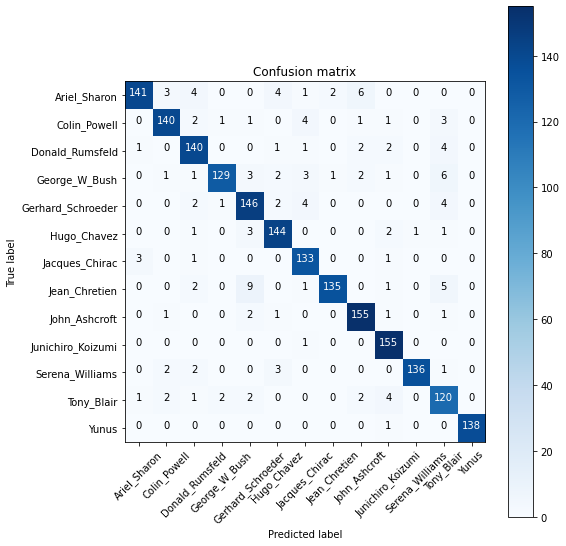

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')


- Calculate metric report menggunakan `classification_report()` pada `scikit-learn` 

In [36]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=labels))

                   precision    recall  f1-score   support

     Ariel_Sharon       0.97      0.88      0.92       161
     Colin_Powell       0.94      0.92      0.93       153
  Donald_Rumsfeld       0.90      0.93      0.91       151
    George_W_Bush       0.97      0.87      0.91       149
Gerhard_Schroeder       0.88      0.92      0.90       159
      Hugo_Chavez       0.92      0.95      0.93       152
   Jacques_Chirac       0.90      0.96      0.93       138
    Jean_Chretien       0.98      0.88      0.93       153
    John_Ashcroft       0.92      0.96      0.94       161
Junichiro_Koizumi       0.92      0.99      0.95       156
  Serena_Williams       0.99      0.94      0.97       144
       Tony_Blair       0.83      0.90      0.86       134
            Yunus       1.00      0.99      1.00       139

         accuracy                           0.93      1950
        macro avg       0.93      0.93      0.93      1950
     weighted avg       0.93      0.93      0.93      

___

# Apply Our Face Dataset

- create new class data from yout face

In [242]:
cap = cv2.VideoCapture(0)

my_name = "Yunus"
os.mkdir(dataset_folder + my_name)
num_sample = 50

i = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret :
        cv2.imshow("Capture Photo", frame)
        cv2.imwrite("dataset/%s/%s_%04d.jpg" %  (my_name, my_name, i), cv2.resize(frame, (250,250)))
        
        if cv2.waitKey(100) == ord('q') or i == num_sample:
            break
        i += 1    
cap.release()
cv2.destroyAllWindows()

- Rerun Load dataset, Traing & Test Model

___
## Facerecognition on Video Frame

In [38]:
from keras.models import load_model

In [41]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [43]:
# --------- load Haar Cascade model -------------
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# --------- load Keras CNN model -------------
model = load_model("model-cnn-facerecognition.h5")
print("[INFO] finish load model...")

cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (50, 50))
            face_img = face_img.reshape(1, 50, 50, 1)
            
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100
            if confidence > 90:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            else :
                label_text = "N/A"
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

[INFO] finish load model...
